# Harmonics and Periodic signals
Consider a signal $x_h(t)$ where the frequencies $f_k$ of the individual cosine-waves are different, but integer multiples of a fundamental frequency $f_0$, 
\begin{align}
	f_k& = k f_0 \quad , & k&= 0,1,2, \ldots \:.
\end{align}
The individual signals $\cos(2\pi k f_0 t +\phi_k)$ are called *harmonics*.
The summed signal $x_h(t)$ can be written as
\begin{align}
	x(t)= \sum_{k=1}^{N}  A_k \cos(2\pi k f_0 t +\phi_k)
	= Re\left\{ \sum_{k=1}^{N}  X_k  e^{j2\pi k f_0 t } \right\}  \quad , \quad X_k=e^{j2\pi \phi}\:.
\end{align}
The period $T_0$ of the fundamental frequency $f_0$ is 
\begin{align}
	T_0 &= \frac{1}{f_0} \:,
\end{align}
while the periods $T_k$ of the harmonics are 
\begin{align}
	T_k &= \frac{1}{f_k} = \frac{1}{k f_0} = \frac{T_0}{k} \:.
\end{align}
The signal with frequency $kf_0$ will repeat itself after the period $T_k=T_0/k$. It will therefore have repeated itself $k$ times after the fundamental period $T_0$. Hence, all the frequency components $kf_0$ will also be periodic with period $T_0$, and the summed signal $x_h(t)$ will be periodic with period $T_0$ given by the fundamental frequency.

The program below creates a signal as a sum of three individual cosine-waves with frequencies $f_k$, amplitudets $A_k$, and phases $\phi_k$, where the marameters can be varied individually. The three individual signal $x_k(t)= A_k \cos(2\pi k f_0 t +\phi_k)$ and their sum $x(t)= \sum_{k=1}^{N}  A_k \cos(2\pi k f_0 t +\phi_k)$ are plotted.
The period of the summed signal can be compared to the frequencies and periods of the three individual components.


In [3]:
"""
Demonstrate periodic signals. 
Create signal as a sum of sine-waves 
"""
import numpy as np
import matplotlib.pyplot as plt
from math import pi, gcd

class Periodicity():
    """Demonstration of periodic signals."""

    def __init__(self):
        self.fs = 4000            # Sample rate [1/s]
        self.A = [1, 0.5, 0.2]    # Amplitudes
        self.f = [50, 100, 150]   # Frequencies [Hz]
        self.phi = [0, 90, 180]   # Phases [degrees]
        self.duration = 0.1       # Signal duration [s]
        self.ax = self.initialise_graphs()

    def initialise_graphs(self):
        """Initialise graphs for signals and spectra."""
        plt.close("all")
        plt.rc('font', size=10)     # Default text sizes
        fig = plt.figure(figsize=[12, 6],
                         constrained_layout=True,
                         num="Periodicity Demo")

        ax = [fig.add_subplot(2, 1, k+1) for k in range(2)]
        for k in range(2):
            ax[k].set(xlabel="Time [s]",
                      ylabel="Amplitude",
                      xlim=[0, self.duration],
                      ylim=3*np.array([-1, 1]),
                      )
            ax[k].minorticks_on()
            ax[k].grid(True, which='both', axis='x')
            ax[k].grid(True, which='major', axis='y')

        return ax

    def f0(self):
        """ Find fundamental frequency."""
        f_int = np.array(self.f).astype(int)  # Integer array needed by gcd
        return np.gcd.reduce(f_int)

    def T0(self):
        """ Find fundamental period."""
        return 1/self.f0()

    def t(self):
        """Create time vector."""
        return np.arange(0, self.duration, 1/self.fs)

    def phase(self):
        """Calculate phase in radians."""
        return np.radians(self.phi)

    def n_frequencies(self):
        """Find number of frequencies to add."""
        return len(self.f)

    def signal(self):
        """Create three cos-waves and their sum."""
        # Individual cosine-signals
        for k in range(self.n_frequencies()):
            s = [self.A[k] * np.cos(2*pi*self.f[k]*self.t() + self.phase()[k])
                 for k in range(self.n_frequencies())]

        # Last element is the sum of the individual signals
        s.append(s[0]+s[1]+s[2])

        return s

    def plot(self):
        """Plot all signals and spectra."""
        # Clear old lines and texts
        for k in range(len(self.ax)):
            for art in list(self.ax[k].lines):
                art.remove()
            for art in list(self.ax[k].texts):
                art.remove()

        # Get and plot signals
        s = self.signal()

        col = ["C1", "C2", "C3", "C4", "C5"]
        # Individual signals
        for k in range(self.n_frequencies()):
            self.ax[0].plot(self.t(), s[k], color=col[k])

        # Summed signals
        self.ax[1].plot(self.t(), s[self.n_frequencies()], color="C0")

        # Add text-box with results
        textstr = '\n'.join([rf"$f_0= {self.f0():.0f}$ Hz",
                             rf"$T_0= {1/self.f0():.3f}$ s"]) 

        self.ax[1].text(0.90, 0.95, textstr, 
                     transform=self.ax[1].transAxes,
                     verticalalignment='top', 
                     bbox=dict(boxstyle='round', facecolor='aliceblue', alpha=0.50))

        return 0


Label(value='Periodic Signals', style=LabelStyle(font_weight='bold'))

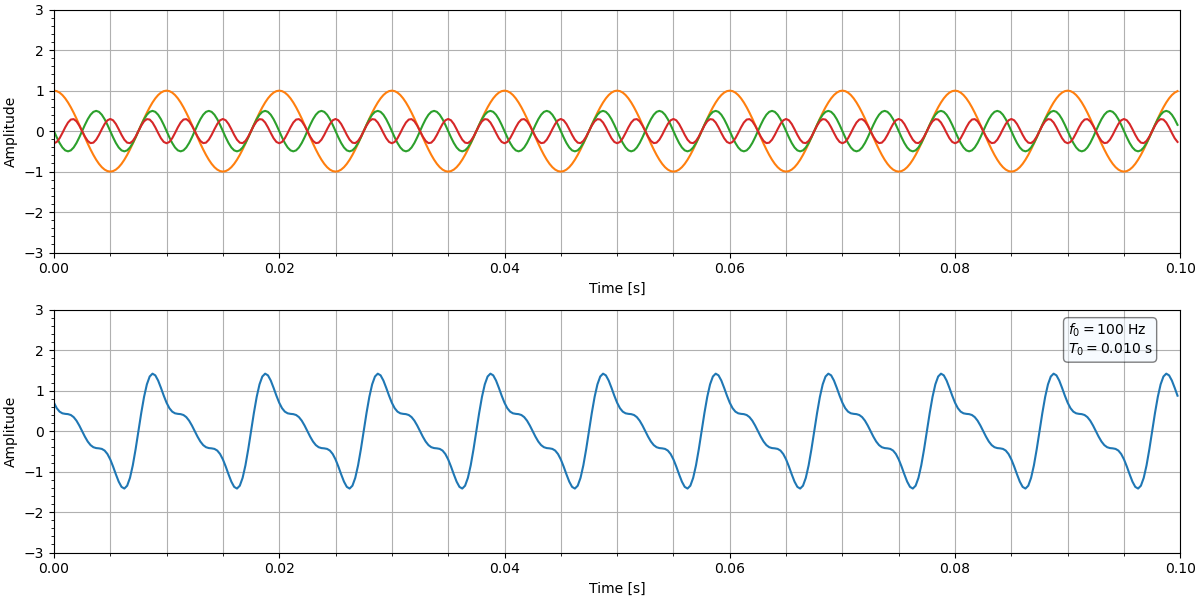

In [7]:
# Use Matplotlib backend that allows interactive operation
%matplotlib ipympl

# Load modules for intereactive operation
import ipywidgets as widgets

#  Function that runs the demo interactively
def run_demo(a_0, f_0, phi_0, a_1, f_1, phi_1, a_2, f_2, phi_2):
    p.A = [a_0, a_1, a_2]
    p.f = [f_0, f_1, f_2]
    p.phi = [phi_0, phi_1, phi_2]

    p.plot()

# Initialise signal
p = Periodicity()

# Define widgets
w_layout = widgets.Layout(width='80%')
widget_style = {'description_width': 'initial'}

title_widget = widgets.Label("Periodic Signals", style=dict(font_weight='bold'))

# Create widgets for interactive operation
width = '80%'
frequency = [100, 200, 300]
frequency_widget = [widgets.FloatText(min=10, max=500, value=n, step=10,
                                 description=r" $f \:$ [Hz]", 
                                 layout=widgets.Layout(width="70%"), 
                                 style=widget_style)
                 for n in frequency]

amplitude = [1.0, 0.5, 0.3]
amplitude_widget = [widgets.FloatSlider(min=0, max=1.5, value=n, step=0.1,
                                 description= " A ", 
                                 layout=widgets.Layout(width="90%"), 
                                 style=widget_style)
                 for n in amplitude]

phase = [0, 90, 180]
phase_widget = [widgets.FloatSlider(min=-360, max=360, value=n, step=15, 
                                 description=r"$\phi \:$ [$\degree]$", 
                                 layout=widgets.Layout(width="80%"), 
                                 style=widget_style)
                 for n in phase]

# Arrange and display widgets 
frequency_col = widgets.VBox(frequency_widget, layout=widgets.Layout(width='20%'))
amplitude_col = widgets.VBox(amplitude_widget, layout=widgets.Layout(width='40%'))
phase_col = widgets.VBox(phase_widget, layout=widgets.Layout(width='40%'))
widget_grid = widgets.HBox([frequency_col, amplitude_col, phase_col], layout=widgets.Layout(width='100%'))

display(title_widget)
display(widget_grid)

# Call display function interactively
w = widgets.interactive(run_demo, 
                        a_0=amplitude_widget[0], f_0=frequency_widget[0], phi_0=phase_widget[0], 
                        a_1=amplitude_widget[1], f_1=frequency_widget[1], phi_1=phase_widget[1], 
                        a_2=amplitude_widget[2], f_2=frequency_widget[2], phi_2=phase_widget[2])